In [2]:
# arrange an instance segmentation model for test
from sahi.utils.mmdet import (
    download_mmdet_retinanet_model,
    download_mmdet_config,
)

# import required functions, classes
from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image
import torch
import pandas as pd
from pandas import DataFrame
from pycocotools.coco import COCO
import numpy as np
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
model_path = '/opt/ml/cv18-detection/work_dirs/retinanet_swin-t_1x_AdamW_nonsplit/best_bbox_mAP_epoch_75.pth'
config_path = "/opt/ml/cv18-detection/work_dirs/retinanet_swin-t_1x_AdamW_nonsplit/retinanet_swin-t_1x_AdamW_nonsplit.py"


In [4]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='mmdet',
    model_path=model_path,
    config_path=config_path,
    confidence_threshold=0.5,
    image_size=640,
    device="cuda:0", # or 'cuda:0'
)

/opt/ml/.local/share/virtualenvs/cv18-detection-aNucPvec/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


load checkpoint from local path: /opt/ml/cv18-detection/work_dirs/retinanet_swin-t_1x_AdamW_nonsplit/best_bbox_mAP_epoch_75.pth


In [5]:
result = get_prediction("/opt/ml/dataset/test/0100.jpg", detection_model)

/opt/ml/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(


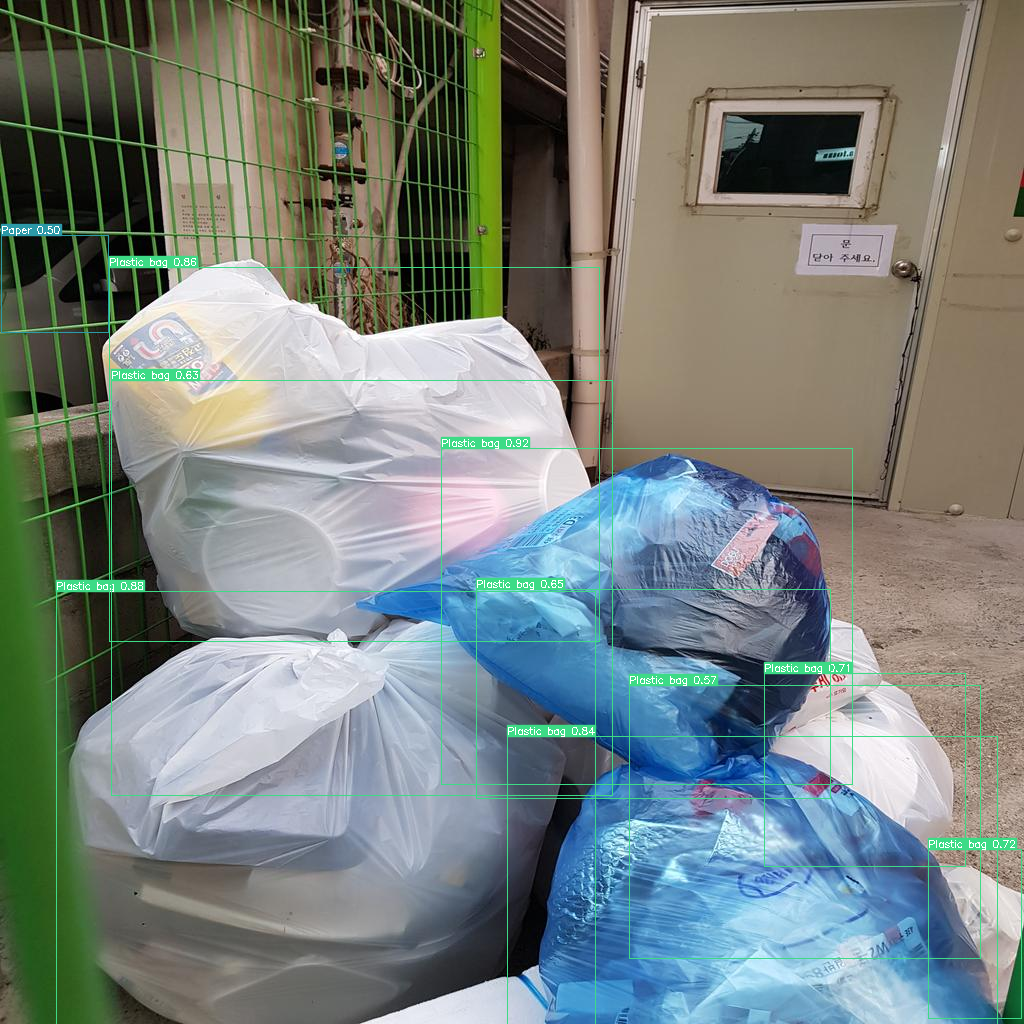

In [6]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

In [7]:
model_type = "mmdet"
model_path = model_path
model_config_path = config_path

model_device = 'cuda:0'
model_confidence_threshold = 0.4

slice_height = 640
slice_width = 640
overlap_height_ratio = 0.2
overlap_width_ratio = 0.2

source_image_dir = "/opt/ml/dataset/test_test/"

In [8]:
predict(
    model_type=model_type,
    model_path=model_path,
    model_config_path=config_path,
    model_device=model_device,
    model_confidence_threshold=model_confidence_threshold,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
    export_pickle=True
)

There are 7 listed files in folder: test_test/
load checkpoint from local path: /opt/ml/cv18-detection/work_dirs/retinanet_swin-t_1x_AdamW_nonsplit/best_bbox_mAP_epoch_75.pth


Performing inference on images:   0%|          | 0/7 [00:00<?, ?it/s]

Performing prediction on 4 number of slices.


Performing inference on images:  14%|█▍        | 1/7 [00:00<00:02,  2.32it/s]

Prediction time is: 357.70 ms
Performing prediction on 4 number of slices.


Performing inference on images:  29%|██▊       | 2/7 [00:00<00:02,  2.34it/s]

Prediction time is: 353.61 ms
Performing prediction on 4 number of slices.


Performing inference on images:  43%|████▎     | 3/7 [00:01<00:01,  2.33it/s]

Prediction time is: 353.64 ms
Performing prediction on 4 number of slices.


Performing inference on images:  57%|█████▋    | 4/7 [00:01<00:01,  2.31it/s]

Prediction time is: 360.13 ms
Performing prediction on 4 number of slices.


Performing inference on images:  71%|███████▏  | 5/7 [00:02<00:00,  2.31it/s]

Prediction time is: 352.90 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|████████▌ | 6/7 [00:02<00:00,  2.30it/s]

Prediction time is: 354.65 ms
Performing prediction on 4 number of slices.


Performing inference on images: 100%|██████████| 7/7 [00:03<00:00,  2.30it/s]

Prediction time is: 355.51 ms
Prediction results are successfully exported to runs/predict/exp


In [ ]:
for object_prediction in object_prediction_list:
    coco_prediction = object_prediction.to_coco_prediction()
    coco_prediction.image_id = coco.images[ind].id
    coco_prediction_json = coco_prediction.json
    if coco_prediction_json["bbox"]:
        coco_json.append(coco_prediction_json)

In [10]:
import pickle
with open("./runs/predict/exp/pickles/0001.pickle","rb") as fr:
    data = pickle.load(fr)

for d in data:
    coco_prediction = d.to_coco_prediction()
    coco_prediction_json = coco_prediction.json
    print(coco_prediction_json)

{'image_id': None, 'bbox': [343.06304931640625, 233.229736328125, 428.29864501953125, 484.84320068359375], 'score': 0.6442389488220215, 'category_id': 2, 'category_name': 'Paper pack', 'segmentation': [], 'iscrowd': 0, 'area': 207657}
{'image_id': None, 'bbox': [351.57342529296875, 166.22337341308594, 406.43212890625, 552.0449066162109], 'score': 0.5983495116233826, 'category_id': 3, 'category_name': 'Metal', 'segmentation': [], 'iscrowd': 0, 'area': 224368}
{'image_id': None, 'bbox': [131.28810119628906, 1.0273590087890625, 350.1206512451172, 282.1993865966797], 'score': 0.47327718138694763, 'category_id': 3, 'category_name': 'Metal', 'segmentation': [], 'iscrowd': 0, 'area': 98803}
{'image_id': None, 'bbox': [140.7925567626953, 0.0, 367.01487731933594, 281.02423095703125], 'score': 0.41678979992866516, 'category_id': 4, 'category_name': 'Glass', 'segmentation': [], 'iscrowd': 0, 'area': 103140}
{'image_id': None, 'bbox': [125.80780029296875, 0.0, 395.43194580078125, 289.4335632324219